In [1]:
# Uncomment the following line if matplotlib is not installed.
# !pip install matplotlib

from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time

## 1.准备数据集

In [21]:
mnist_train=datasets.FashionMNIST(train=True)

In [22]:
X,y=mnist_train[0]

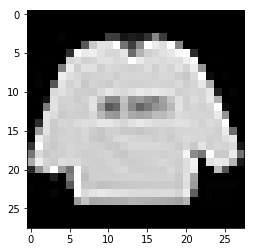

In [23]:
plt.imshow(X[:,:,0].asnumpy(),cmap='gray')

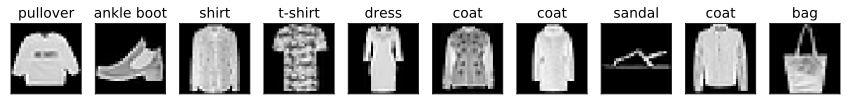

In [28]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
X, y = mnist_train[0:10]
# plot images
display.set_matplotlib_formats('svg')
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy(),cmap='gray')
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [38]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
mnist_train = mnist_train.transform_first(transformer)

In [39]:
loader=gluon.data.DataLoader(mnist_train,batch_size=128, shuffle=True, num_workers=4)

In [41]:
for data, label in loader:
    print(data.shape, label.shape)
    break

(128, 1, 28, 28) (128,)


In [42]:
#获得验证数据
mnist_test=datasets.FashionMNIST(train=False)
val_loader=gluon.data.DataLoader(mnist_test,batch_size=32)

## 2.定义模型

In [50]:

net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu',weight_initializer=init.Uniform()),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())
loss=gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [ ]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) ==
            label.astype('float32')).mean().asscalar()